# Jupyter Notebook Activity: Running CASCADE naturally and with human dynamics

In this activity, you will learn how to run `CASCADE` with various modules enabled. You will also learn how to update variables outside of CASCADE's framework (e.g. in this notebook).

In [1]:
# These are the various libraries we will need

import matplotlib.pyplot as plt
import numpy as np

# Because CASCADE is a Class in Python, we can import it with all its functions
from cascade import Cascade

# We can also import other files stored on the local jupyterhub
from cascade.tools import plotters as cascade_plt

### Running CASCADE: natural dynamics

In [2]:
# In order to run CASCADE with natural dynamics, all additional modules are turned off (set to False) in the initialization

datadir = "data/"
name = "natural_dynamics"
iB3D = 0
total_time = 101

cascade_natural = Cascade(
    datadir,
    name=name,
    elevation_file="barrier3d-default-elevation.npy",
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="barrier3d-default-parameters.yaml",
    storm_file="cascade-default-storms.npy", 
    num_cores=1,  
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    alongshore_section_count=1,
    time_step_count=total_time,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
)


In [3]:
# we run CASCADE by calling its update function

for time_step in range(cascade_natural._nt - 1):
    print("\r", "Time Step: ", time_step + 1, end="")
    cascade_natural.update()
    if cascade_natural.b3d_break:  # here, we check to see if the barrier has drowned and stop if it has
        break# Jupyter Notebook Activity: Running CASCADE naturally and with human dynamics

 Time Step:  11

/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1533: RuntimeWarning: invalid value encountered in scalar divide
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1534: RuntimeWarning: invalid value encountered in scalar divide
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  100

After intializing cascade, you can access variables (which are mostly housed in Barrier3D) using the notation `cascade.barrier3d[0].variable_name`. See the example below, where we plot the domain at various time steps from the model run.

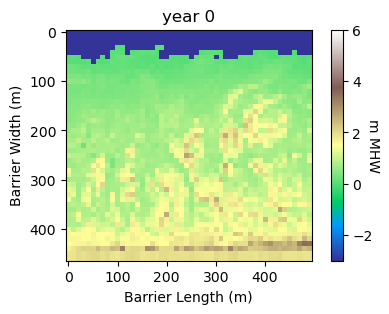

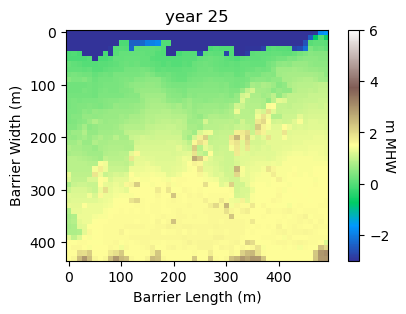

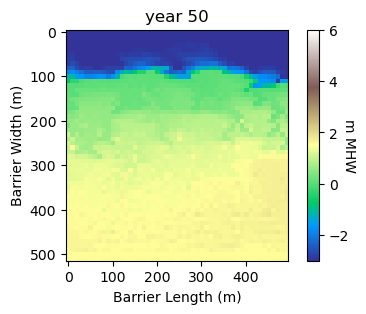

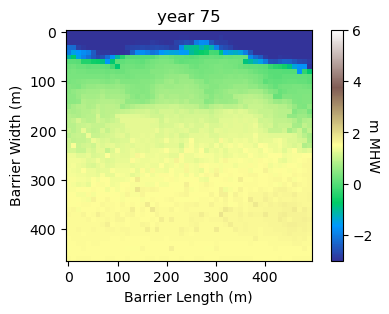

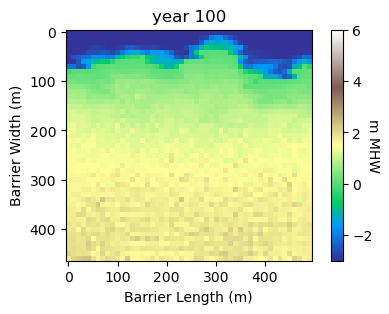

In [39]:
# plotting results from the natural run

plot_years = [0, 25, 50, 75, 100]
vmin = -3
vmax = 6
plot_num = 1

for year in plot_years:
    dune_domain = np.transpose(cascade_natural.barrier3d[0]._DuneDomain[year]) + cascade_natural.barrier3d[0].BermEl
    interior_domain = cascade_natural.barrier3d[0]._DomainTS[year]
    full_domain = np.vstack([dune_domain, interior_domain])
    
    fig1 = plt.figure(figsize=(5,3))
    ax1 = fig1.add_subplot()
    mat = ax1.matshow(
        np.flip(full_domain) * 10,
        cmap="terrain",
        vmin=vmin,
        vmax=vmax,
    )
    ax1.set_title("year {0}".format(year))
    plt.gca().xaxis.tick_bottom()
    xtick_max = np.shape(full_domain)[1]  # n_cols = x
    x_ticks = np.array(range(0, xtick_max, 10))
    x_tick_labels = x_ticks * 10
    ytick_max = np.shape(full_domain)[0]  # n_rows = y
    y_ticks = np.array(range(0, ytick_max, 10))
    y_tick_labels = y_ticks * 10
    plt.xticks(x_ticks, x_tick_labels)
    plt.yticks(y_ticks, y_tick_labels)
    plt.ylabel("Barrier Width (m)")
    plt.xlabel("Barrier Length (m)")
    cbar = fig1.colorbar(mat)
    cbar.set_label('m MHW', rotation=270, labelpad=5)
    plot_num += 1

Text(0, 0.5, 'Overwash Flux [$m^3/m$]')

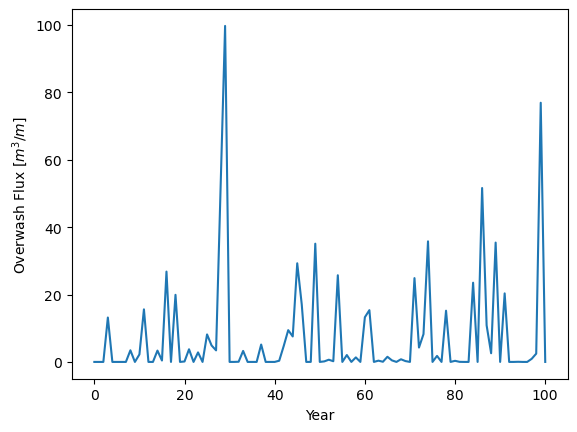

In [38]:
# plotting the overwash flux 
plt.figsize=(5,3)
OWTS = cascade_natural.barrier3d[0].QowTS #m3/m
plt.plot(OWTS)
plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")

<div class="alert alert-block alert-success"> In the natural scenario, the barrier increases in elevation and widens due to overwash. 
    </div>

### Running CASCADE: human dynamics

Some of the human dynamics including rebuilding the dunes to specific heights and conducting beach nourishments to keep the beach at a specific width. See below how these management strategies alter the evolution of the barrier. 

In [8]:
# In order to run CASCADE with human dynamics, we can set roadway_management and/or beach_nourishment on

datadir = "data/"
name = "human_dynamics"
iB3D = 0
total_time = 101

cascade_human = Cascade(
    datadir,
    name=name,
    elevation_file="barrier3d-default-elevation.npy",
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="barrier3d-default-parameters.yaml",
    storm_file="cascade-default-storms.npy", 
    num_cores=1,  
    roadway_management_module=True,
    alongshore_transport_module=False,
    beach_nourishment_module=True,
    community_economics_module=False,
    alongshore_section_count=1,
    time_step_count=total_time,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
)

In [9]:
for time_step in range(cascade_human._nt - 1):
    print("\r", "Time Step: ", time_step + 1, end="")
    cascade_human.update()
    if cascade_human.b3d_break:
        break

 Time Step:  100

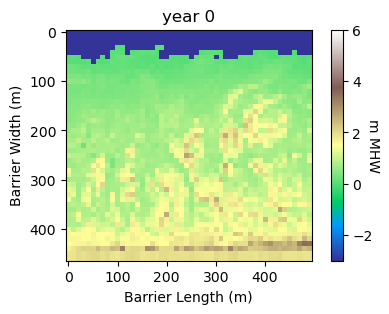

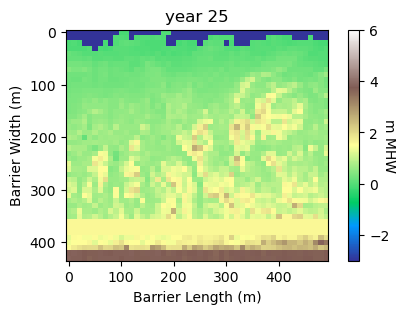

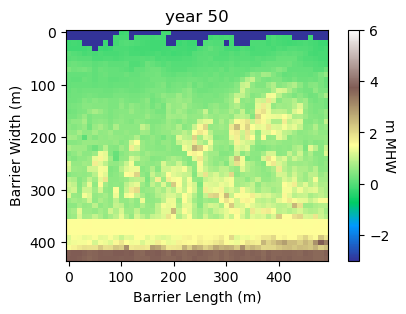

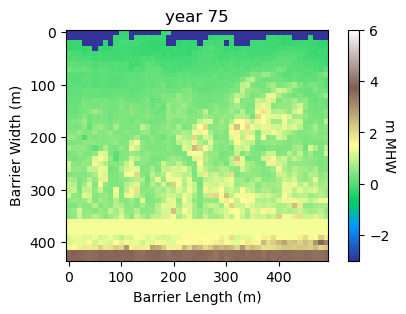

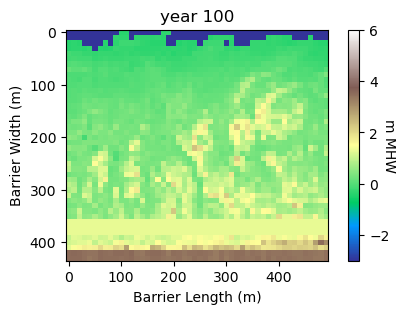

In [37]:
# plotting results from the natural run
# we can get parameters saved within cascade by using "cascade_natural.barrier3d[0]._____"

plot_years = [0, 25, 50, 75, 100]
vmin = -3
vmax = 6

for year in plot_years:
    dune_domain_human = np.transpose(cascade_human.barrier3d[0]._DuneDomain[year]) + cascade_human.barrier3d[0].BermEl
    interior_domain_human = cascade_human.barrier3d[0]._DomainTS[year]
    full_domain_human = np.vstack([dune_domain_human, interior_domain_human])
    
    fig1 = plt.figure(figsize=(5,3))
    ax1 = fig1.add_subplot()
    mat = ax1.matshow(
        np.flip(full_domain_human) * 10,
        cmap="terrain",
        vmin=vmin,
        vmax=vmax,
    )
    ax1.set_title("year {0}".format(year))
    plt.gca().xaxis.tick_bottom()
    xtick_max = np.shape(full_domain_human)[1]  # n_cols = x
    x_ticks = np.array(range(0, xtick_max, 10))
    x_tick_labels = x_ticks * 10
    ytick_max = np.shape(full_domain_human)[0]  # n_rows = y
    y_ticks = np.array(range(0, ytick_max, 10))
    y_tick_labels = y_ticks * 10
    plt.xticks(x_ticks, x_tick_labels)
    plt.yticks(y_ticks, y_tick_labels)
    plt.ylabel("Barrier Width (m)")
    plt.xlabel("Barrier Length (m)")
    cbar = fig1.colorbar(mat)
    cbar.set_label('m MHW', rotation=270, labelpad=5)

In [19]:
# plotting the overwash flux 
OWTS_human = cascade_human.barrier3d[0].QowTS #m3/m
plt.plot(OWTS, label="natural")
plt.plot(OWTS_human, label="human", color="green)
plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
plt.legend()

SyntaxError: unterminated string literal (detected at line 4) (2323917789.py, line 4)

<div class="alert alert-block alert-success"> We can see that with human management of the barrier, the dunes remain higher, but the barrier narrows. Additionally there is little change to the barrier interior. This is due to the taller dunes limiting overwash flux. 
    </div>

In [12]:
# Now that you have a better understanding of how CASCADE works, we want you to add code to simulate the effect of sand fences on dunes. Since the human dynamics already alters the dunes, try it using natural dynamics. 

datadir = "data/"
name = "natural_sand_fence"
iB3D = 0
total_time = 101

cascade_natural_sandfence = Cascade(
    datadir,
    name=name,
    elevation_file="barrier3d-default-elevation.npy",
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="barrier3d-default-parameters.yaml",
    storm_file="cascade-default-storms.npy", 
    num_cores=1,  
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    alongshore_section_count=1,
    time_step_count=total_time,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
)

<b>In our example, sand fences decrease the maximum elevation of the first line of dunes while increasing their growth rate. The second line of dunes gets a decreased growth rate. This aligns with research that shows sand fences create shorter, wider dunes. 

<div class="alert alert-block alert-danger"> If we want to alter growth params for both dune lines, we will need to alter Barrier3D. Same with applying different Dmax values to different dunes.
</div>

In [13]:
for time_step in range(cascade_natural_sandfence._nt - 1):
    print("\r", "Time Step: ", time_step + 1, end="")
    cascade_natural_sandfence.update()    
    
    ### INSERT CODE HERE ###

    
    if cascade_natural_sandfence.b3d_break:
        break

 Time Step:  28

/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1533: RuntimeWarning: invalid value encountered in scalar divide
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1534: RuntimeWarning: invalid value encountered in scalar divide
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  100

## Comparing the three scenarios - plots

<b>Growth Parameter

<b>Dune Crests

<b> Overwash

<b> Elevations